# SEPTEMBER DATASET

In [64]:


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [65]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
from sklearn.metrics import roc_auc_score
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import plotly.plotly as py
df1 = pd.read_csv('201709-CAH_PulseOfTheNation.csv')
df1hot = pd.read_csv('201709-CAH_PulseOfTheNation.csv')
df2 = pd.read_csv('201710-CAH_PulseOfTheNation.csv')
df2hot = pd.read_csv('201710-CAH_PulseOfTheNation.csv')
df3 = pd.read_csv('201711-CAH_PulseOfTheNation.csv')
df3hot = pd.read_csv('201711-CAH_PulseOfTheNation.csv')
df1.head()

,Income,Gender,Age,Age Range,Political Affiliation,Do you approve or disapprove of how Donald Trump is handling his job as president?,What is your highest level of education?,Q5OTH1,What is your race?,Q6OTH1,...,Do you agree or disagree with the following statement: vaccines are safe and protect children from disease.,"How many books, if any, have you read in the past year?",q14x,Do you believe in ghosts?,What percentage of the federal budget would you estimate is spent on scientific research?,q16x,"Is federal funding of scientific research too high, too low, or about right?",True or false: the earth is always farther away from the sun in the winter than in the summer.,"If you had to choose: would you rather be smart and sad, or dumb and happy?",Do you think it is acceptable or unacceptable to urinate in the shower?
0,8000.0,Female,64,55-64,Democrat,Strongly disapprove,College degree,NaN,White,NaN,...,Somewhat Disagree,20.0,NaN,Yes,NaN,Yes,Too Low,FALSE,Smart and Sad,Unacceptable
1,68000.0,Female,56,55-64,Democrat,Strongly disapprove,High school,NaN,Black,NaN,...,Somewhat Disagree,6.0,NaN,No,90.0,NaN,Too High,FALSE,Smart and Sad,Unacceptable
2,46000.0,Male,63,55-64,Independent,Somewhat Approve,Some college,NaN,White,NaN,...,Strongly Agree,0.0,NaN,No,20.0,NaN,About Right,TRUE,Dumb and happy,Acceptable
3,51000.0,Male,48,45-54,Republican,Strongly Approve,High school,NaN,White,NaN,...,Somewhat Disagree,1.0,NaN,No,10.0,NaN,About Right,FALSE,Dumb and happy,Unacceptable
4,100000.0,Female,32,25-34,Democrat,Somewhat Approve,Some college,NaN,White,NaN,...,Strongly Agree,30.0,NaN,Yes,NaN,Yes,Too Low,FALSE,Smart and Sad,Acceptable


In [66]:
df1['Do you approve or disapprove of how Donald Trump is handling his job as president?'].unique()

array(['Strongly disapprove', 'Somewhat Approve', 'Strongly Approve',
       'Somewhat disapprove', 'Neither approve nor disapprove', 'DK/REF'],
      dtype=object)

# Visualization

<BarContainer object of 6 artists>

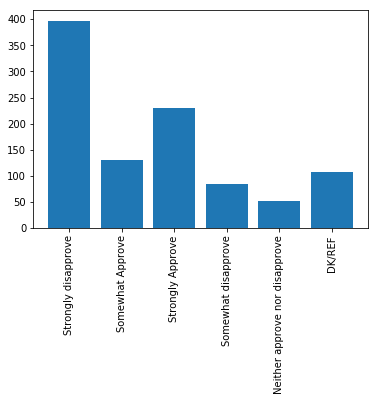

In [67]:
# PLOT TRUMP'S APPROVAL

x = df1['Do you approve or disapprove of how Donald Trump is handling his job as president?'].unique()
y = [len(df1[df1['Do you approve or disapprove of how Donald Trump is handling his job as president?'] == 'Strongly disapprove']), len(df1[df1['Do you approve or disapprove of how Donald Trump is handling his job as president?'] == 'Somewhat Approve']), len(df1[df1['Do you approve or disapprove of how Donald Trump is handling his job as president?'] == 'Strongly Approve']), len(df1[df1['Do you approve or disapprove of how Donald Trump is handling his job as president?'] == 'Somewhat disapprove']), len(df1[df1['Do you approve or disapprove of how Donald Trump is handling his job as president?'] == 'Neither approve nor disapprove']), len(df1[df1['Do you approve or disapprove of how Donald Trump is handling his job as president?'] == 'DK/REF'])]

plt.xticks(rotation='vertical')
plt.bar(x,y)

<BarContainer object of 4 artists>

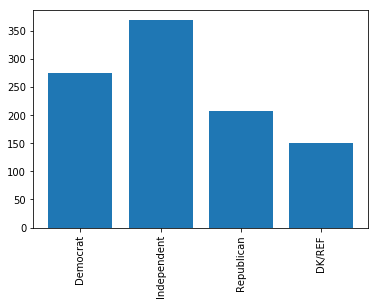

In [68]:
# PLOT POLITICAL AFFILIATION

x = df1['Political Affiliation'].unique()
y = [len(df1[df1['Political Affiliation'] == 'Democrat']), len(df1[df1['Political Affiliation'] == 'Independent']), len(df1[df1['Political Affiliation'] == 'Republican']), len(df1[df1['Political Affiliation'] == 'DK/REF'])]
plt.xticks(rotation='vertical')
plt.bar(x,y)

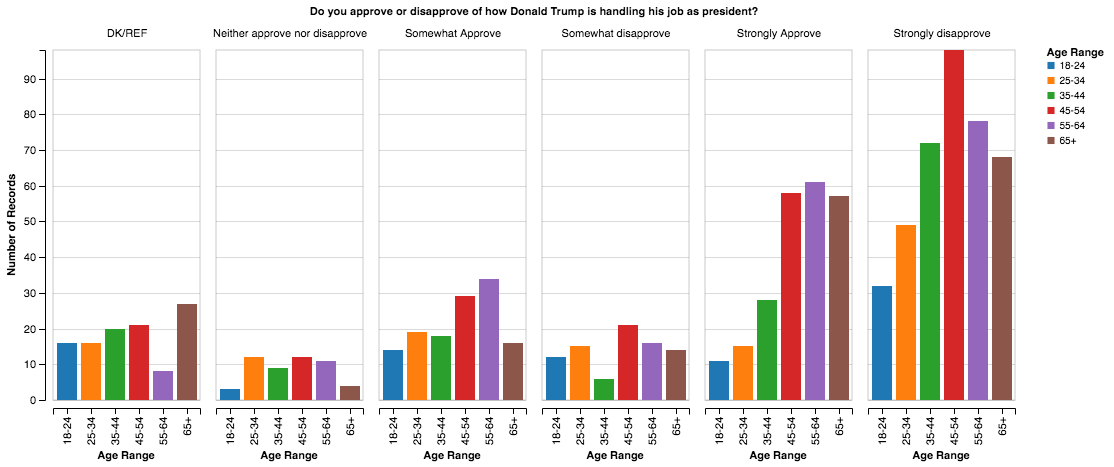

In [69]:
import altair
altair.Chart(df1hot, max_rows=10000).mark_bar().encode(x='Age Range',color='Age Range',column='Do you approve or disapprove of how Donald Trump is handling his job as president?',y='count(*)')
#altair.Chart(df1hot, max_rows=10000).mark_bar().encode(x='Age Range',color='Age Range',y='Do you approve or disapprove of how Donald Trump is handling his job as president?')

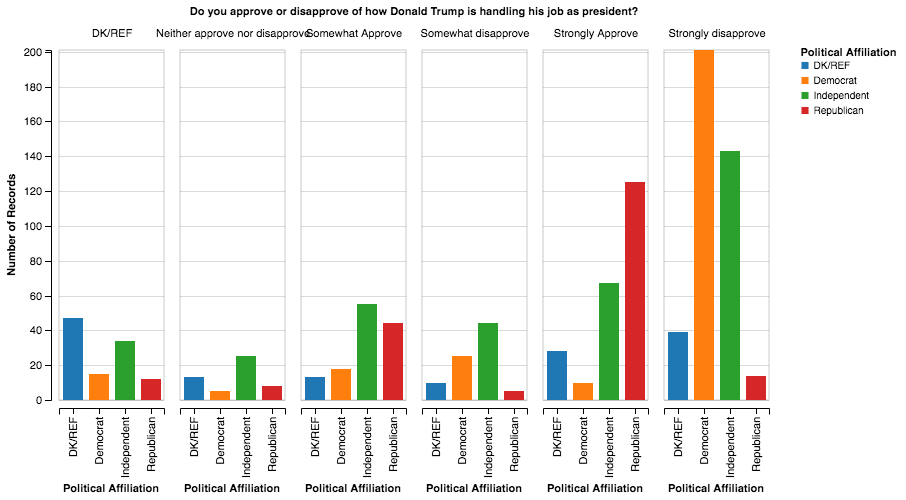

In [70]:
import altair
altair.Chart(df1hot, max_rows=10000).mark_bar().encode(x='Political Affiliation',color='Political Affiliation',column='Do you approve or disapprove of how Donald Trump is handling his job as president?',y='count(*)')

# Some Transformation

In [71]:
df1 = df1.drop('Q5OTH1', axis=1)
df1 = df1.drop('Q6OTH1', axis=1)
df1 = df1.drop('Q7OTH1', axis=1)
df1 = df1.drop('q8x', axis=1)
df1 = df1.drop('q11x', axis=1)
df1 = df1.drop('q14x', axis=1)
df1 = df1.drop('q16x', axis=1)
df1.head()
df1hot = df1hot.drop('Q5OTH1', axis=1)
df1hot = df1hot.drop('Q6OTH1', axis=1)
df1hot = df1hot.drop('Q7OTH1', axis=1)
df1hot = df1hot.drop('q8x', axis=1)
df1hot = df1hot.drop('q11x', axis=1)
df1hot = df1hot.drop('q14x', axis=1)
df1hot = df1hot.drop('q16x', axis=1)

## Fill in numeric columns with median value

In [72]:
df1['What percentage of the federal budget would you estimate is spent on scientific research?'] = df1['What percentage of the federal budget would you estimate is spent on scientific research?'].fillna(df1['What percentage of the federal budget would you estimate is spent on scientific research?'].median())

df1['Income'] = df1['Income'].fillna(df1['Income'].median())


df1hot['What percentage of the federal budget would you estimate is spent on scientific research?'] = df1hot['What percentage of the federal budget would you estimate is spent on scientific research?'].fillna(df1hot['What percentage of the federal budget would you estimate is spent on scientific research?'].median())

df1hot['Income'] = df1hot['Income'].fillna(df1hot['Income'].median())

In [73]:
def get_y_list(vals):
    res = []
    for i in vals:
        val = i.lower()
        if 'neither' in val or 'dk' in val:
            res.append(2)
        elif 'disapprove' in val:
            res.append(0)
        else:
            res.append(1)
    return res

# One Hot - and remove rows that didn't answer the question we're trying to classify
* This turns the problem from multi-class into a binary classification problem

In [74]:
df1hot['Do you approve or disapprove of how Donald Trump is handling his job as president?'] = get_y_list(df1hot['Do you approve or disapprove of how Donald Trump is handling his job as president?'])

cols_to_transform = list(df1hot.columns)
cols_remove = ['Age', 'Age Range', 'Income', 'Do you approve or disapprove of how Donald Trump is handling his job as president?']
cols = [col for col in cols_to_transform if col not in cols_remove]

df1hot = pd.get_dummies( columns = cols, data=df1hot )
df1hot = df1hot.drop('Age Range', axis=1)

In [75]:
df1hot.head()

,Income,Age,Do you approve or disapprove of how Donald Trump is handling his job as president?,Gender_DK/REF,Gender_Female,Gender_Male,Gender_Other,Political Affiliation_DK/REF,Political Affiliation_Democrat,Political Affiliation_Independent,...,"Is federal funding of scientific research too high, too low, or about right?_Too Low",True or false: the earth is always farther away from the sun in the winter than in the summer._DK/REF,True or false: the earth is always farther away from the sun in the winter than in the summer._FALSE,True or false: the earth is always farther away from the sun in the winter than in the summer._TRUE,"If you had to choose: would you rather be smart and sad, or dumb and happy?_DK/REF","If you had to choose: would you rather be smart and sad, or dumb and happy?_Dumb and happy","If you had to choose: would you rather be smart and sad, or dumb and happy?_Smart and Sad",Do you think it is acceptable or unacceptable to urinate in the shower?_Acceptable,Do you think it is acceptable or unacceptable to urinate in the shower?_DK/REF,Do you think it is acceptable or unacceptable to urinate in the shower?_Unacceptable
0,8000.0,64,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1,68000.0,56,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
2,46000.0,63,1,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
3,51000.0,48,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,100000.0,32,1,0,1,0,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0


In [76]:
accs = []
aucs = []
cms = []

# Train/Test split

In [77]:
y = df1['Do you approve or disapprove of how Donald Trump is handling his job as president?'].values
X = df1.drop('Do you approve or disapprove of how Donald Trump is handling his job as president?',axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=4) 

# Decision Tree

In [78]:
df1hot = df1hot.drop(df1hot[df1hot['Do you approve or disapprove of how Donald Trump is handling his job as president?'] == 2].index)
y = df1hot['Do you approve or disapprove of how Donald Trump is handling his job as president?'].values
X = df1hot.drop('Do you approve or disapprove of how Donald Trump is handling his job as president?',axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=5) 
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
accs.append(accuracy_score(y_test, ypred))

In [79]:
cms.append(confusion_matrix(y_test, ypred))

In [80]:
aucs.append(roc_auc_score(y_test,ypred))

# Random Forest

In [81]:
model = RandomForestClassifier(max_depth=15)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
accs.append(accuracy_score(y_test, ypred))

In [82]:
cms.append(confusion_matrix(y_test, ypred))
aucs.append(roc_auc_score(y_test,ypred))

# Naive Bayes

In [83]:
model = GaussianNB()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
accs.append(accuracy_score(y_test, ypred))

In [84]:
cms.append(confusion_matrix(y_test, ypred))
aucs.append(roc_auc_score(y_test,ypred))

# Support Vector Machine

In [85]:
model = SVC()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
accs.append(accuracy_score(y_test, ypred))
cms.append(confusion_matrix(y_test, ypred))
aucs.append(roc_auc_score(y_test,ypred))

# Comparisons for October dataset

<BarContainer object of 4 artists>

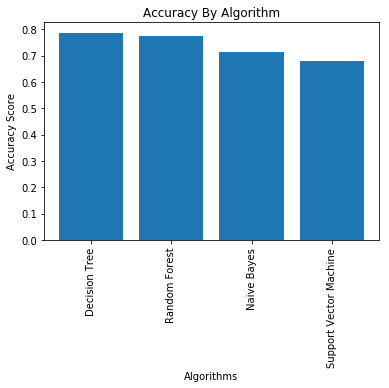

In [86]:
labels = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Support Vector Machine']
plt.xticks(rotation='vertical')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy By Algorithm')
plt.bar(labels,accs)

<BarContainer object of 4 artists>

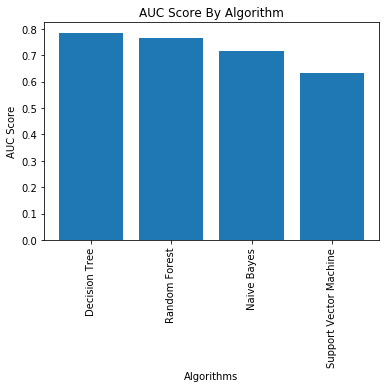

In [87]:
plt.xticks(rotation='vertical')
plt.xlabel('Algorithms')
plt.ylabel('AUC Score')
plt.title('AUC Score By Algorithm')
plt.bar(labels,aucs)

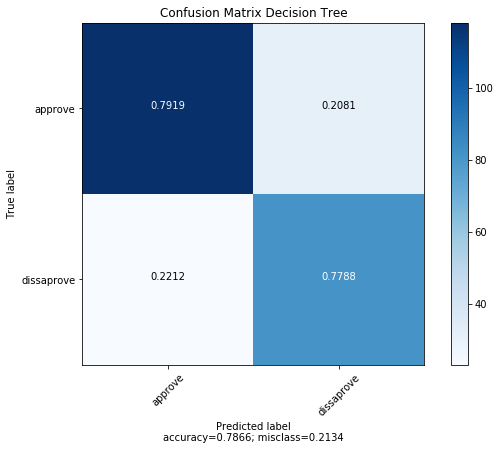

In [88]:
plot_confusion_matrix(cm = cms[0],normalize=True, target_names = ['approve', 'dissaprove'],title = "Confusion Matrix Decision Tree")

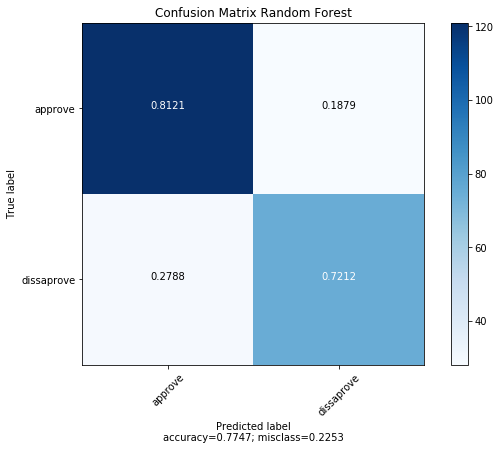

In [89]:
plot_confusion_matrix(cm = cms[1],normalize=True, target_names = ['approve', 'dissaprove'],title = "Confusion Matrix Random Forest")

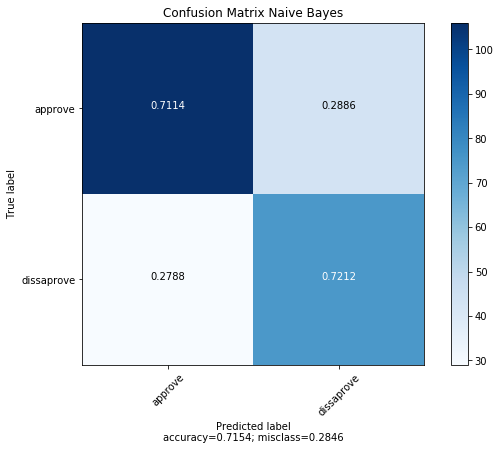

In [90]:
plot_confusion_matrix(cm = cms[2],normalize=True, target_names = ['approve', 'dissaprove'],title = "Confusion Matrix Naive Bayes")

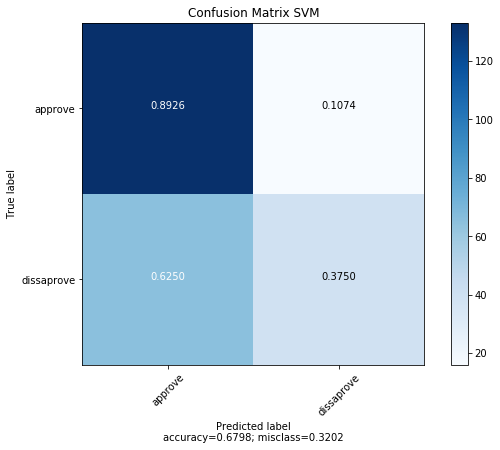

In [91]:
plot_confusion_matrix(cm = cms[3],normalize=True, target_names = ['approve', 'dissaprove'],title = "Confusion Matrix SVM")

# OCTOBER DATASET

In [92]:
df2.head()

,Income,Gender,Age,Age Range,Political Affiliation,Do you approve or disapprove of how Donald Trump is handling his job as president?,What is your highest level of education?,Q6OTH1,What is your race?,Q5OTH1,...,Do you think that government policies should help those who are poor and struggling in America?,"If you had to guess, what percentage of Republicans would say yes to that question?",Do you think that most white people in America are racist?,"If you had to guess, what percentage of Democrats would say yes to that question?",Have you lost any friendships or other relationships as a result of the 2016 presidential election?,Do you think it is likely or unlikely that there will be a Civil War in the United States within the next decade?,Have you ever gone hunting?,Have you ever eaten a kale salad?,"If Dwayne ""The Rock"" Johnson ran for president as a candidate for your political party, would you vote for him?","Who would you prefer as president of the United States, Darth Vader or Donald Trump?"
0,192000.0,Female,35,35-44,Strong Republican,DK/REF,College degree,NaN,White,NaN,...,Yes,75.0,No,50.0,No,Unlikely,No,No,No,Donald Trump
1,54000.0,Female,58,55-64,Independent,Disapprove,Some college,NaN,White,NaN,...,Yes,90.0,No,50.0,No,Likely,No,No,Yes,Darth Vader
2,20000.0,Male,50,45-54,Not Strong Democrat,Approve,Other,7th grade,White,NaN,...,Yes,50.0,Yes,30.0,No,Likely,Yes,No,Yes,Donald Trump
3,21000.0,Female,40,35-44,Independent,Disapprove,College degree,NaN,White,NaN,...,Yes,50.0,Yes,35.0,No,Likely,No,Yes,No,Darth Vader
4,164000.0,Female,42,35-44,Strong Democrat,DK/REF,Graduate degree,NaN,Black,NaN,...,Yes,0.0,DK/REF,0.0,No,Unlikely,No,Yes,Yes,Darth Vader


## Data Cleanup Again - this time for October survey

In [93]:
df2 = df2.drop('Q5OTH1', axis=1)
df2 = df2.drop('Q6OTH1', axis=1)
df2 = df2.drop('q8x', axis=1)
df2 = df2.drop('q10x', axis=1)
df2 = df2.drop('Who would you prefer as president of the United States, Darth Vader or Donald Trump?', axis=1)
df2.head()

,Income,Gender,Age,Age Range,Political Affiliation,Do you approve or disapprove of how Donald Trump is handling his job as president?,What is your highest level of education?,What is your race?,"From what you have heard or seen, do you mostly agree or mostly disagree with the beliefs of White Nationalists?","If you had to guess, what percentage of Republicans would say that they mostly agree with the beliefs of White Nationalists?",...,"If you had to guess, what percentage of Democrats would say that they love America?",Do you think that government policies should help those who are poor and struggling in America?,"If you had to guess, what percentage of Republicans would say yes to that question?",Do you think that most white people in America are racist?,"If you had to guess, what percentage of Democrats would say yes to that question?",Have you lost any friendships or other relationships as a result of the 2016 presidential election?,Do you think it is likely or unlikely that there will be a Civil War in the United States within the next decade?,Have you ever gone hunting?,Have you ever eaten a kale salad?,"If Dwayne ""The Rock"" Johnson ran for president as a candidate for your political party, would you vote for him?"
0,192000.0,Female,35,35-44,Strong Republican,DK/REF,College degree,White,DK/REF,NaN,...,40.0,Yes,75.0,No,50.0,No,Unlikely,No,No,No
1,54000.0,Female,58,55-64,Independent,Disapprove,Some college,White,DK/REF,NaN,...,80.0,Yes,90.0,No,50.0,No,Likely,No,No,Yes
2,20000.0,Male,50,45-54,Not Strong Democrat,Approve,Other,White,Agree,10.0,...,60.0,Yes,50.0,Yes,30.0,No,Likely,Yes,No,Yes
3,21000.0,Female,40,35-44,Independent,Disapprove,College degree,White,DK/REF,NaN,...,30.0,Yes,50.0,Yes,35.0,No,Likely,No,Yes,No
4,164000.0,Female,42,35-44,Strong Democrat,DK/REF,Graduate degree,Black,DK/REF,NaN,...,NaN,Yes,0.0,DK/REF,0.0,No,Unlikely,No,Yes,Yes


In [94]:
df2['If you had to guess, what percentage of Republicans would say that they mostly agree with the beliefs of White Nationalists?'] = df2['If you had to guess, what percentage of Republicans would say that they mostly agree with the beliefs of White Nationalists?'].fillna(df2['If you had to guess, what percentage of Republicans would say that they mostly agree with the beliefs of White Nationalists?'].median())

df2['Income'] = df2['Income'].fillna(df2['Income'].median())

df2['If you had to guess, what percentage of Republicans would say yes to that question?'] = df2['If you had to guess, what percentage of Republicans would say yes to that question?'].fillna(df2['If you had to guess, what percentage of Republicans would say yes to that question?'].median())

df2['If you had to guess, what percentage of Democrats would say yes to that question?'] = df2['If you had to guess, what percentage of Democrats would say yes to that question?'].fillna(df2['If you had to guess, what percentage of Democrats would say yes to that question?'].median())


# One Hot

In [95]:
df2['Do you approve or disapprove of how Donald Trump is handling his job as president?'] = get_y_list(df2['Do you approve or disapprove of how Donald Trump is handling his job as president?'])
cols_to_transform = list(df2.columns)
cols_remove = ['Age', 'Age Range', 'Income', 'Do you approve or disapprove of how Donald Trump is handling his job as president?']
cols = [col for col in cols_to_transform if col not in cols_remove]

df2 = pd.get_dummies( columns = cols, data=df2 )
df2 = df2.drop('Age Range', axis=1)

In [96]:
df2.head()

,Income,Age,Do you approve or disapprove of how Donald Trump is handling his job as president?,Gender_DK/REF,Gender_Female,Gender_Male,Gender_Other,Political Affiliation _DK/REF,Political Affiliation _Independent,Political Affiliation _Not Strong Democrat,...,Do you think it is likely or unlikely that there will be a Civil War in the United States within the next decade?_Unlikely,Have you ever gone hunting?_DK/REF,Have you ever gone hunting?_No,Have you ever gone hunting?_Yes,Have you ever eaten a kale salad?_DK/REF,Have you ever eaten a kale salad?_No,Have you ever eaten a kale salad?_Yes,"If Dwayne ""The Rock"" Johnson ran for president as a candidate for your political party, would you vote for him?_DK/REF","If Dwayne ""The Rock"" Johnson ran for president as a candidate for your political party, would you vote for him?_No","If Dwayne ""The Rock"" Johnson ran for president as a candidate for your political party, would you vote for him?_Yes"
0,192000.0,35,2,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
1,54000.0,58,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,20000.0,50,1,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
3,21000.0,40,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,164000.0,42,2,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1


## Only 121 respondents didn't answer the approval question. So let's turn this from a multi-classification problem to a binary-classification problem by dropping all rows with No response - we're not trying to predict who didn't answer the question

In [97]:
print(len(df2[df2['Do you approve or disapprove of how Donald Trump is handling his job as president?'] == 0]))
print(len(df2[df2['Do you approve or disapprove of how Donald Trump is handling his job as president?'] == 1]))
print(len(df2[df2['Do you approve or disapprove of how Donald Trump is handling his job as president?'] == 2]))

523
356
121


In [98]:
df2 = df2.drop(df2[df2['Do you approve or disapprove of how Donald Trump is handling his job as president?'] == 2].index)

In [99]:
df2['Do you approve or disapprove of how Donald Trump is handling his job as president?'].unique()

array([0, 1])

# Train/Test split

In [100]:
y = df2['Do you approve or disapprove of how Donald Trump is handling his job as president?'].values
X = df2.drop('Do you approve or disapprove of how Donald Trump is handling his job as president?',axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=4) 

In [101]:
accs = []
aucs = []
cms = []

# Decision Tree

In [102]:
model = DecisionTreeClassifier(max_depth=8)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
ac = accuracy_score(y_test, ypred)
accs.append(ac)
ac

0.7694805194805194

In [103]:
auc = roc_auc_score(np.array(y_test), np.array(ypred))
aucs.append(auc)
auc

0.7438907103825136

In [104]:
cm = confusion_matrix(y_test, ypred)
cms.append(cm)
cm

array([[161,  22],
       [ 49,  76]])

In [105]:
decision_tree_metrics = [ac,auc]

# Random Forest

In [106]:
model = RandomForestClassifier(max_depth=9)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
ac = accuracy_score(y_test, ypred)
accs.append(ac)
ac

0.7564935064935064

In [107]:
cm = confusion_matrix(y_test, ypred)
cms.append(cm)
cm

array([[164,  19],
       [ 56,  69]])

In [108]:
auc = roc_auc_score(y_test, ypred)
aucs.append(auc)
auc

0.724087431693989

In [109]:
rf_metrics = [ac,auc]
rf_model = model

# Naive Bayes

In [110]:
model = GaussianNB()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
ac = accuracy_score(y_test, ypred)
accs.append(ac)
ac

0.724025974025974

In [111]:
cm = confusion_matrix(y_test, ypred)
cms.append(cm)
cm

array([[175,   8],
       [ 77,  48]])

In [112]:
auc = roc_auc_score(np.array(y_test), np.array(ypred))
aucs.append(auc)
auc

0.6701420765027322

In [113]:
nb_metrics = [ac,auc]

# Support Vector Machine

In [114]:
model = SVC()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
ac = accuracy_score(y_test, ypred)
accs.append(ac)
ac

0.5941558441558441

In [115]:
cm = confusion_matrix(y_test, ypred)
cms.append(cm)
cm

array([[174,   9],
       [116,   9]])

In [116]:
auc = roc_auc_score(np.array(y_test), np.array(ypred))
aucs.append(auc)
auc

0.5114098360655738

In [117]:
sv_metrics = [ac,auc]

# Comparisons for October dataset

<BarContainer object of 4 artists>

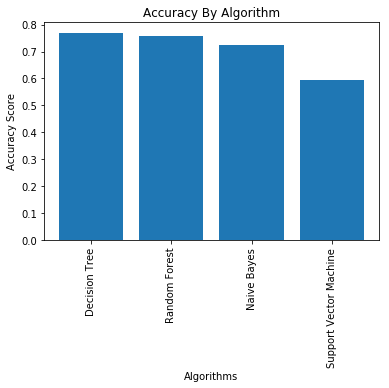

In [118]:
labels = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Support Vector Machine']
plt.xticks(rotation='vertical')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy By Algorithm')
plt.bar(labels,accs)

<BarContainer object of 4 artists>

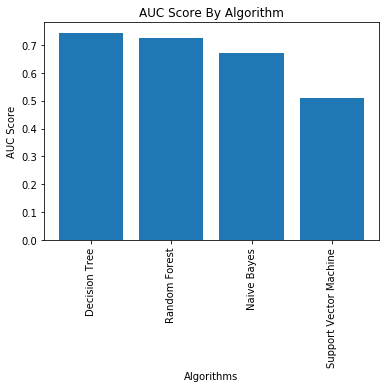

In [119]:
plt.xticks(rotation='vertical')
plt.xlabel('Algorithms')
plt.ylabel('AUC Score')
plt.title('AUC Score By Algorithm')
plt.bar(labels,aucs)

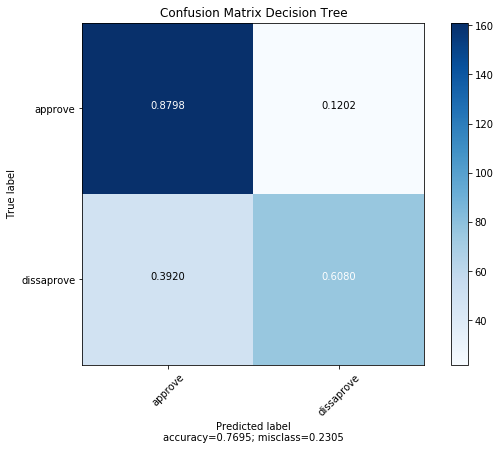

In [120]:
plot_confusion_matrix(cm = cms[0],normalize=True, target_names = ['approve', 'dissaprove'],title = "Confusion Matrix Decision Tree")

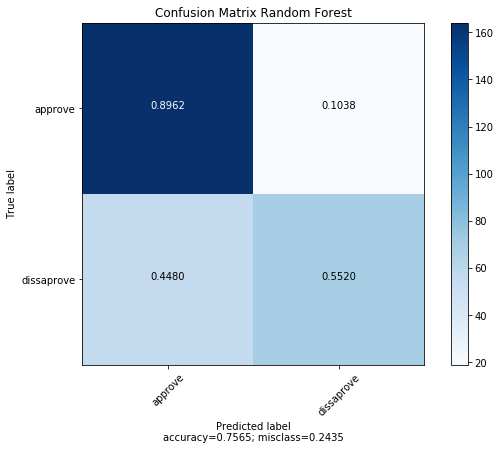

In [121]:
plot_confusion_matrix(cm = cms[1],normalize=True, target_names = ['approve', 'dissaprove'],title = "Confusion Matrix Random Forest")

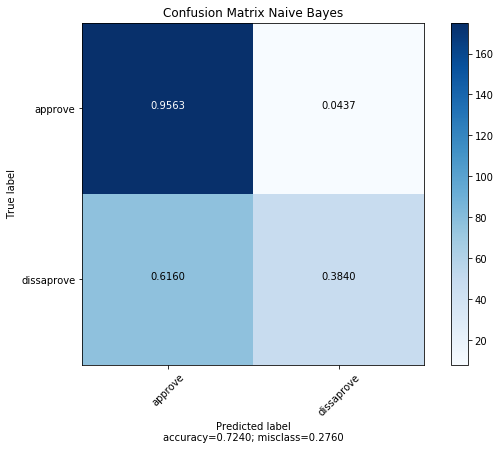

In [122]:
plot_confusion_matrix(cm = cms[2],normalize=True, target_names = ['approve', 'dissaprove'],title = "Confusion Matrix Naive Bayes")

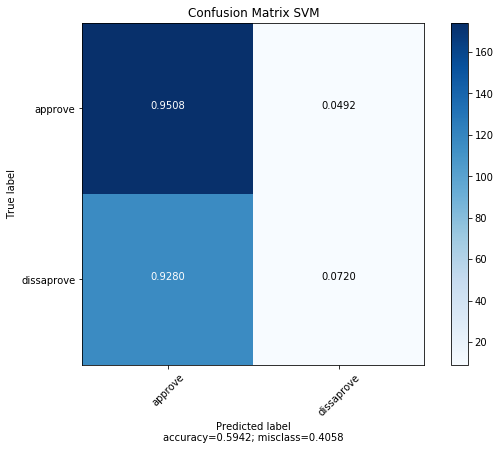

In [123]:
plot_confusion_matrix(cm = cms[3],normalize=True, target_names = ['approve', 'dissaprove'],title = "Confusion Matrix SVM")